<a href="https://colab.research.google.com/github/12869741/ACTINN/blob/master/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import all libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

from torch.utils.data import random_split
import torchvision
import torchvision.transforms as transforms

import os
import argparse

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Jan 27 17:27:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    19W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# these are commonly used data augmentations
# random cropping and random horizontal flip
# lastly, we normalize each channel into zero mean and unit standard deviation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    transforms.RandomErasing(value=(0.4914, 0.4822, 0.4465), inplace=False),
    #transforms.RandomErasing(p=0.4, scale=(0.02, 0.22), ratio=(0.3, 3.3), value=(0.4914, 0.4822, 0.4465), inplace=False),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])


trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)



  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
torch.manual_seed(0)
train_set,val_set = random_split(trainset,[40000,10000])

trainloader = torch.utils.data.DataLoader(
    train_set, batch_size=128, shuffle=True, num_workers=2)

#testset = torchvision.datasets.CIFAR10(
    #root='./data', train=False, download=True, transform=transform_test)

# we can use a larger batch size during test, because we do not save 
# intermediate variables for gradient computation, which leaves more memory
testloader = torch.utils.data.DataLoader(
    val_set, batch_size=256, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

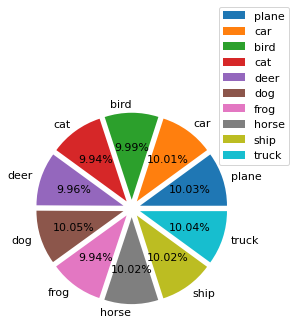

In [ ]:
import numpy as np
num=np.zeros(10)
for i in range(0,40000):
  num[train_set[i][-1]]+=1
size=num/400
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Calibri'] 
plt.rcParams['font.size']=11
plt.pie(size,explode=[0.1, 0.1, 0.1,0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1],
        labels=['plane', 'car', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck'],autopct='%1.2f%%')
plt.legend(loc=(0.9,0.7))
plt.show()

# 新段落

#Data Augmentation
Data augmentation performs random modifications of the image as a preprocessing step. It serves the following purposes:
1. It increases the amount of data for training.
2. By deleting features, it prevents the network from relying on a narrow set of features, which may not generalize.
3. By changing features while maintaining the same output, it helps the network become tolerant of changes that do not change the image lab. 

In short, data augmentation desensitivizes the network, so it extracts features that are invariant to changes that should not affect the prediction. 

We showcase a few random data augmentation provided by PyTorch.

In [ ]:
! wget https://www.cesarsway.com/wp-content/uploads/2019/07/AdobeStock_197962036-1024x683.jpeg
! mv AdobeStock_197962036-1024x683.jpeg dog.jpg

--2022-11-23 12:36:41--  https://www.cesarsway.com/wp-content/uploads/2019/07/AdobeStock_197962036-1024x683.jpeg
Resolving www.cesarsway.com (www.cesarsway.com)... 104.22.31.81, 172.67.12.103, 104.22.30.81
Connecting to www.cesarsway.com (www.cesarsway.com)|104.22.31.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64141 (63K) [image/jpeg]
Saving to: ‘AdobeStock_197962036-1024x683.jpeg’

AdobeStock_19796203 100%[===================>]  62.64K  --.-KB/s    in 0.001s  

2022-11-23 12:36:42 (72.2 MB/s) - ‘AdobeStock_197962036-1024x683.jpeg’ saved [64141/64141]



In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as T
from torchvision.io import read_image

plt.rcParams["savefig.bbox"] = 'tight'
torch.manual_seed(1)

def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = T.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

dog1 = read_image('dog.jpg')
show([dog1])
#dog1 = read_image(str(Path('assets') / 'dog1.jpg'))
#dog2 = read_image(str(Path('assets') / 'dog2.jpg'))
#show([dog1, dog2])1

RuntimeError: ignored

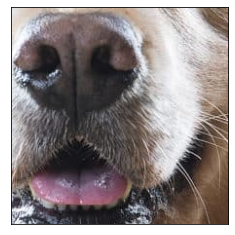

In [ ]:
import torch.nn as nn
transforms = torch.nn.Sequential(
    T.RandomCrop(224), #randomly crop a 224x224 region from the image
    T.RandomHorizontalFlip(p=0.3), # with a given probability, perform horizontal flip
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
dog1 = dog1.to(device)
# dog2 = dog2.to(device)

# transformed_dog1 = transforms(dog1)
transformed_dog1 = transforms(dog1)
show([transformed_dog1])

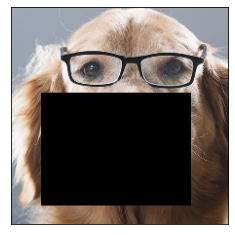

In [ ]:
import torch.nn as nn
transforms = torch.nn.Sequential(
    T.Resize(256), # resize the short edge to 256.
    T.RandomCrop(224), #randomly crop a 224x224 region from the image
    T.RandomErasing(p=1, scale=(0.3, 0.4), ratio=(0.1,10),  inplace=False)
    #T.ColorJitter(brightness=0.3, contrast=0.2, saturation=0.1, hue=0.1)
    #T.AutoAugment()
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
dog1 = dog1.to(device)
# dog2 = dog2.to(device)

# transformed_dog1 = transforms(dog1)
transformed_dog1 = transforms(dog1)
show([transformed_dog1])

In [ ]:
transformed_dog1 = transforms(dog1)

See more examples at: https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py



---



In [ ]:
# Training
def train(epoch, net, criterion, trainloader, scheduler):
    device = 'cuda'
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        if (batch_idx+1) % 50 == 0:
          print("iteration : %3d, loss : %0.4f, accuracy : %2.2f" % (batch_idx+1, train_loss/(batch_idx+1), 100.*correct/total))

    scheduler.step()
    return train_loss/(batch_idx+1), 100.*correct/total

In [ ]:
# modifid Training
def train(epoch, net, criterion, trainloader, scheduler):
    device = 'cuda'
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        
        _, predicted = outputs.max(1)
        for i,idx in enumerate(predicted):
          if idx.eq(targets[i]):
            outputs[i,idx] =10.

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        #_, predicted = outputs.softmax(dim=1).max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        if (batch_idx+1) % 50 == 0:
          print("iteration : %3d, loss : %0.4f, accuracy : %2.2f" % (batch_idx+1, train_loss/(batch_idx+1), 100.*correct/total))

    scheduler.step()
    return train_loss/(batch_idx+1), 100.*correct/total

In [ ]:
# modifid Training
def final_train(epoch, net, criterion, trainloader, scheduler):
    device = 'cuda'
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)

        _, predicted = outputs.max(1)
        for i,idx in enumerate(predicted):
          if idx.eq(targets[i]):
            outputs[i,idx] =100.

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        #_, predicted = outputs.softmax(dim=1).max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        if (batch_idx+1) % 50 == 0:
          print("iteration : %3d, loss : %0.4f, accuracy : %2.2f" % (batch_idx+1, train_loss/(batch_idx+1), 100.*correct/total))

    scheduler.step()
    return train_loss/(batch_idx+1), 100.*correct/total

Test performance on the test set. Note the use of `torch.inference_mode()`

In [ ]:
def test(epoch, net, criterion, testloader):
    device = 'cuda'
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.inference_mode():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    return test_loss/(batch_idx+1), 100.*correct/total



In [ ]:
def save_checkpoint(net, acc, epoch):
    # Save checkpoint.
    print('Saving..')
    state = {
        'net': net.state_dict(),
        'acc': acc,
        'epoch': epoch,
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/resnet18-cifar10.pth')





In [ ]:
#save_checkpoint(net,93.63,299)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# defining resnet models

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion *
                               planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        # This is the "stem"
        # For CIFAR (32x32 images), it does not perform downsampling
        # It should downsample for ImageNet
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        # four stages with three downsampling
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


def ResNet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])


def ResNet50():
    return ResNet(Bottleneck, [3, 4, 6, 3])


def ResNet101():
    return ResNet(Bottleneck, [3, 4, 23, 3])


def ResNet152():
    return ResNet(Bottleneck, [3, 8, 36, 3])


def test_resnet18():
    net = ResNet18()
    y = net(torch.randn(1, 3, 32, 32))
    print(y.size())


In [ ]:
# main body
config = {
    'lr': 0.01,
    'momentum': 0.9,
    'weight_decay': 1e-2
}

net = ResNet18().to('cuda')

#checkpoint = torch.load('./drive/MyDrive/resnet18-cifar10.pth')
#net.load_state_dict(checkpoint['net'])

criterion = nn.CrossEntropyLoss().to('cuda')
optimizer = optim.SGD(net.parameters(), lr=config['lr'],
                      momentum=config['momentum'], weight_decay=config['weight_decay'])
#optimizer = optim.SGD(net.parameters(), lr=config['lr'],
                      #momentum=config['momentum'], weight_decay=0)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=300)
#scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma =1.0)

train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []

In [ ]:
epoch = checkpoint['epoch']
acc = checkpoint['acc']

checkpoint = torch.load('./drive/MyDrive/resnet18-cifar10.pth')
net.load_state_dict(checkpoint['net'])


<All keys matched successfully>

In [ ]:
for epoch in range(300):
    train_loss, train_acc = train(epoch, net, criterion, trainloader, scheduler)
    test_loss, test_acc = test(epoch, net, criterion, testloader)
    
    print(("Epoch : %3d, training loss : %0.4f, training accuracy : %2.2f, test loss " + \
      ": %0.4f, test accuracy : %2.2f") % (epoch, train_loss, train_acc, test_loss, test_acc))
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
for epoch in range(0, 300):
    train_loss, train_acc = final_train(epoch, net, criterion, trainloader, scheduler)
    test_loss, test_acc = test(epoch, net, criterion, testloader)
    
    print(("Epoch : %3d, training loss : %0.4f, training accuracy : %2.2f, test loss " + \
      ": %0.4f, test accuracy : %2.2f") % (epoch, train_loss, train_acc, test_loss, test_acc))
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
state = {
     'net': net.state_dict(),
     'acc': acc,
    'epoch': epoch,
    'optimizer': optimizer.state_dict(),

    }
torch.save(state, './drive/MyDrive/resnet18-cifar10.pth')


Streaming output truncated to the last 5000 lines.
iteration : 150, loss : 0.5804, accuracy : 80.88
iteration : 200, loss : 0.5820, accuracy : 80.69
iteration : 250, loss : 0.5817, accuracy : 80.74
iteration : 300, loss : 0.5795, accuracy : 80.85
Epoch :  44, training loss : 0.5801, training accuracy : 80.81, test loss : 0.9650, test accuracy : 67.37

Epoch: 45
iteration :  50, loss : 0.5866, accuracy : 80.23
iteration : 100, loss : 0.5710, accuracy : 81.13
iteration : 150, loss : 0.5808, accuracy : 80.86
iteration : 200, loss : 0.5881, accuracy : 80.61
iteration : 250, loss : 0.5843, accuracy : 80.71
iteration : 300, loss : 0.5853, accuracy : 80.71
Epoch :  45, training loss : 0.5840, training accuracy : 80.79, test loss : 0.7506, test accuracy : 74.64

Epoch: 46
iteration :  50, loss : 0.5732, accuracy : 80.67
iteration : 100, loss : 0.5720, accuracy : 80.95
iteration : 150, loss : 0.5801, accuracy : 80.69
iteration : 200, loss : 0.5788, accuracy : 80.79
iteration : 250, loss : 0.578

In [ ]:

#optimizer = optim.SGD(net.parameters(), lr=config['lr'],
                      #momentum=config['momentum'], weight_decay=0)
#scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=300)
for epoch in range(0, 300):
    train_loss, train_acc = final_train(epoch, net, criterion, trainloader, scheduler)
    test_loss, test_acc = test(epoch, net, criterion, testloader)
    
    print(("Epoch : %3d, training loss : %0.4f, training accuracy : %2.2f, test loss " + \
      ": %0.4f, test accuracy : %2.2f") % (epoch, train_loss, train_acc, test_loss, test_acc))
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

state = {
     'net': net.state_dict(),
     'acc': acc,
    'epoch': epoch,
    'optimizer': optimizer.state_dict(),

    }
torch.save(state, './drive/MyDrive/resnet18-cifar10-finaltrain.pth')


Epoch: 0
iteration :  50, loss : 1.3361, accuracy : 37.42
iteration : 100, loss : 1.3169, accuracy : 35.63
iteration : 150, loss : 1.2568, accuracy : 37.08
iteration : 200, loss : 1.2101, accuracy : 38.57
iteration : 250, loss : 1.1661, accuracy : 40.09
iteration : 300, loss : 1.1253, accuracy : 41.55
Epoch :   0, training loss : 1.1178, training accuracy : 41.84, test loss : 1.7820, test accuracy : 37.72

Epoch: 1
iteration :  50, loss : 0.8615, accuracy : 51.97
iteration : 100, loss : 0.8548, accuracy : 52.16
iteration : 150, loss : 0.8566, accuracy : 52.08
iteration : 200, loss : 0.8422, accuracy : 52.84
iteration : 250, loss : 0.8251, accuracy : 53.62
iteration : 300, loss : 0.8106, accuracy : 54.41
Epoch :   1, training loss : 0.8087, training accuracy : 54.50, test loss : 1.5578, test accuracy : 48.27

Epoch: 2
iteration :  50, loss : 0.7440, accuracy : 57.80
iteration : 100, loss : 0.7197, accuracy : 59.12
iteration : 150, loss : 0.7151, accuracy : 59.42
iteration : 200, loss :

KeyboardInterrupt: ignored

Visualisation

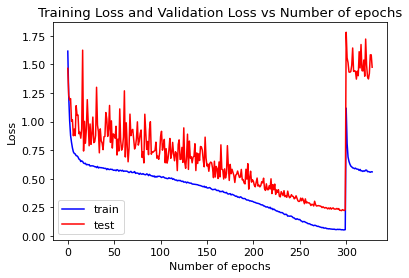

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(train_loss_list)), train_loss_list, 'b')
plt.plot(range(len(test_loss_list)), test_loss_list, 'r')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Training Loss and Validation Loss vs Number of epochs")
plt.legend(['train', 'test'])
plt.show()

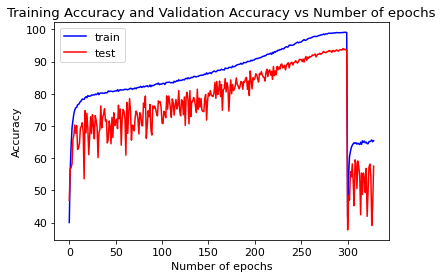

In [ ]:
plt.plot(range(len(train_acc_list)), train_acc_list, 'b')
plt.plot(range(len(test_acc_list)), test_acc_list, 'r')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy and Validation Accuracy vs Number of epochs")
plt.legend(['train', 'test'])
plt.show()

In [ ]:
testset = torchvision.datasets.CIFAR10(
            root='./data', train=False, download=True, transform=transform_test)
testloader_new = torch.utils.data.DataLoader(
    testset, batch_size=256, shuffle=True, num_workers=2)
test_loss, test_acc = test(epoch, net, criterion, testloader_new)


Files already downloaded and verified


In [ ]:
testloader_new = torch.utils.data.DataLoader(
    testset, batch_size=256, shuffle=False, num_workers=2)

In [ ]:
test_loss, test_acc = test(epoch, net, criterion, testloader_new)

In [ ]:
test_loss

0.15489103514701127

In [ ]:
test_acc

95.92

In [ ]:
# import all libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

from torch.utils.data import random_split
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms as T
import os
import argparse

In [ ]:
transform_test_orginal = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [ ]:
transform_test_sametotrain = torch.nn.Sequential(
    T.RandomCrop(32,padding=4), #randomly crop a 224x224 region from the image
    T.RandomHorizontalFlip(), # with a given probability, perform horizontal flip
    #T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    #T.RandomErasing(value=(0.4914, 0.4822, 0.4465), inplace=False)
    #T.Resize(256), # resize the short edge to 256.
    #T.RandomCrop(224), #randomly crop a 224x224 region from the image
    #T.RandomErasing(value=(0.4914, 0.4822, 0.4465),  inplace=False)
    #T.ColorJitter(brightness=0.3, contrast=0.2, saturation=0.1, hue=0.1)
    #T.AutoAugment()
)

In [ ]:
transform_test_onlycutout = transforms.Compose([
    #transforms.RandomCrop(32, padding=4),
    #transforms.RandomHorizontalFlip(),
    #transforms.ToTensor(),
    #transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    transforms.RandomErasing(value=(0.4914, 0.4822, 0.4465), inplace=False),
])


In [ ]:
testset = torchvision.datasets.CIFAR10(
            root='./data', train=False, download=True, transform=transform_test)

Files already downloaded and verified


In [ ]:
testloader_new = torch.utils.data.DataLoader(
    testset, batch_size=256, shuffle=False, num_workers=2)

In [ ]:
test_loss, test_acc = test(epoch, net, criterion, testloader_new)

KeyboardInterrupt: ignored

In [ ]:
test_acc

In [ ]:
epoch, net, criterion, testloader=epoch, net, criterion, testloader_new

In [ ]:
    device = 'cuda'
    #net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.inference_mode():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            #show(inputs)
            inputs, targets = inputs.to(device), targets.to(device)
            
            #original outpust
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            print(loss)
            _, idx = outputs.topk(1)
            outputs.fill_(0)
            for i,idx in enumerate(idx):
              outputs[i,idx] = 1


            #for i,idx in enumerate(targets):
              #targets[i]=outputs.fill_(0)

            #print(outputs)
            #outputs with dropout test model
            for model_num in range(0):
              outputs_dropout = net(inputs)
              #_, idx = outputs_dropout.topk(1)
              #outputs_dropout.fill_(0)
              #for i,idx in enumerate(idx):
                #outputs_dropout[i,idx] = 1
              outputs+=outputs_dropout
              print(outputs_dropout) 
            #print(outputs)

            #outputs with test data augmentation
            for i in range(0):#20
              input_new=transform_test_sametotrain(inputs)
              #show(input_new)
              output_new=net(input_new)
              _, idx = output_new.topk(1)
              output_new.fill_(0)
              for i,idx in enumerate(idx):
                output_new[i,idx] = 1
              #print(output_new)
              outputs+=output_new          
            loss = criterion(outputs, targets)
            #print(outputs)
            #print(targets)
            print(loss)
            #test_loss += loss.item()
            _, predicted = outputs.softmax(dim=1).max(1)
            #print(predicted)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            break
            #print(100.*correct/total)

            #if predicted.eq(targets).sum().item()==0:
              #show(inputs)
              #print(predicted)
              #print(targets)
              #print(outputs)

              #break




tensor(0.2028, device='cuda:0')
tensor(0.2028, device='cuda:0')


In [ ]:
print(100.*correct/total)

100.0


tensor(3, device='cuda:0')

In [ ]:
if predicted[0]==targets[0]:
  print(1)

1


In [ ]:
torch.tensor([3]).to(device)

tensor([3], device='cuda:0')

In [ ]:
_

tensor([0.9854], device='cuda:0')

In [ ]:
#只要决策一样，无所谓概率

In [ ]:
new_targets=torch.full((outputs.size(0), outputs.size(1)), 0, dtype=torch.float).to(device)

for i,idx in enumerate(targets):
  new_targets[i,idx] = _[i].item()

In [ ]:
new_targets

tensor([[0.0000, 0.0000, 0.0000, 0.9854, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000]], device='cuda:0')

In [ ]:
criterion(outputs,new_targets)

tensor(0.0145, device='cuda:0')

In [ ]:
# Example of target with class indices
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)\
print(input)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output.backward()

# Example of target with class probabilities
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
output = loss(input, target)
output.backward()

SyntaxError: ignored

tensor([[ 0.4528,  1.3431,  1.1865, -1.6627, -0.6361],
        [-0.6386,  1.3222, -0.0206,  1.6236, -2.4215],
        [-1.0644, -0.3006,  1.3785,  0.0610, -0.6525]], requires_grad=True)

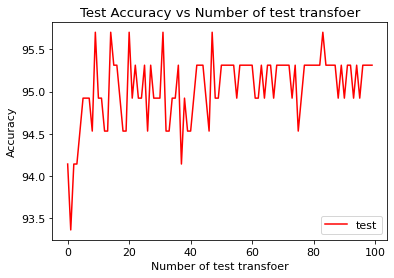

In [ ]:
plt.plot(range(len(acc)), acc, 'r')
plt.xlabel("Number of test transfoer")
plt.ylabel("Accuracy")
plt.title("Test Accuracy vs Number of test transfoer")
plt.legend(['test'])
plt.show()

In [ ]:
print(outputs)

tensor([[ -9.2506,  -9.9050,  -6.8305,  -7.1605,  -1.4486,  -2.6066, -10.3928,
          67.0620, -10.0639,  -9.4035],
        [-12.9461, -12.8055,  -5.6755,   6.3213,  -7.2658,  70.9844, -10.7342,
          -3.6475, -11.1479, -13.0836],
        [  0.3116,  -6.1520,  -8.0601,  -7.6329,  -8.9985, -10.7799, -10.2662,
         -10.0866,  69.1178,  -7.4532],
        [ 69.7842, -10.3725,  -1.9621,  -9.0065,  -9.3878, -11.6120,  -9.4140,
          -9.5373,   0.1210,  -8.6129],
        [ -1.5735,  -6.2166,  -9.4822,  -7.9711, -10.4957, -10.9525, -10.8189,
         -10.7241,  75.3320,  -7.0974],
        [-10.0998, -13.5578,  10.0452,  -5.6489,  60.1755,  -8.6837,  -7.6032,
           1.3202, -12.9265, -13.0212],
        [ -9.3067,  -9.3750,  -7.0225,  -5.0389,  -0.9673,  -3.5582, -10.3536,
          62.2241,  -8.0862,  -8.5157],
        [ 69.2833,  -3.8675,  -0.2458,  -9.8451, -10.7793, -11.7074, -11.8285,
         -10.4580,  -1.8132,  -8.7383],
        [ -9.6312, -10.8654,  -5.4681,  67.7537,

In [ ]:
_, idx = outputs.topk(1)
outputs.fill_(0)
outputs[idx] = 1

In [ ]:
x=torch.tensor([[-0.9356, -0.8788, -0.5429,  5.9189, -0.8111,  0.6680, -0.5342, -0.9068,
         -0.9368, -1.0408],
        [ 0.1073,  0.3945, -0.8960, -0.6689, -0.9704, -0.9367, -0.9815, -1.0185,
          5.6991, -0.7288]])

In [ ]:
_, idx = x.topk(1)

In [ ]:
x

tensor([[-0.9356, -0.8788, -0.5429,  5.9189, -0.8111,  0.6680, -0.5342, -0.9068,
         -0.9368, -1.0408],
        [ 0.1073,  0.3945, -0.8960, -0.6689, -0.9704, -0.9367, -0.9815, -1.0185,
          5.6991, -0.7288]])

In [ ]:

              print(predicted)
              print(targets)
              print(outputs)


tensor([6], device='cuda:0')
tensor([7], device='cuda:0')
tensor([[ 0.,  0.,  0.,  0.,  0.,  0., 15.,  1.,  0.,  5.]], device='cuda:0')


In [ ]:
print(outputs)

tensor([[ 0.,  0.,  0.,  0.,  0.,  0., 15.,  1.,  0.,  5.]], device='cuda:0')


In [ ]:
x = torch.tensor([[ 54.4106,   3.1318,  15.9805, -20.5428,   5.1818, -35.7464, -34.0833,
         -13.1337,  51.8403, -13.9237]])
_, idx = x.topk(1)
x.fill_(0)
x[0,idx] = 1

In [ ]:
x.fill_(0)
x[0,idx] = 1

In [ ]:
x

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
idx

tensor([[0, 8]])

In [ ]:
print(100.*correct/total)

96.01
